In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Current script directory
current_dir = Path.cwd()

# Path to sibling folder
data_file = current_dir.parent / 'data' / 'raw'/ 'train.csv'

In [4]:
df = pd.read_csv(data_file)

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [6]:
df.drop(columns="id", inplace=True)

In [7]:
features = df.select_dtypes("number").drop(columns=["BeatsPerMinute"]).columns

<Axes: >

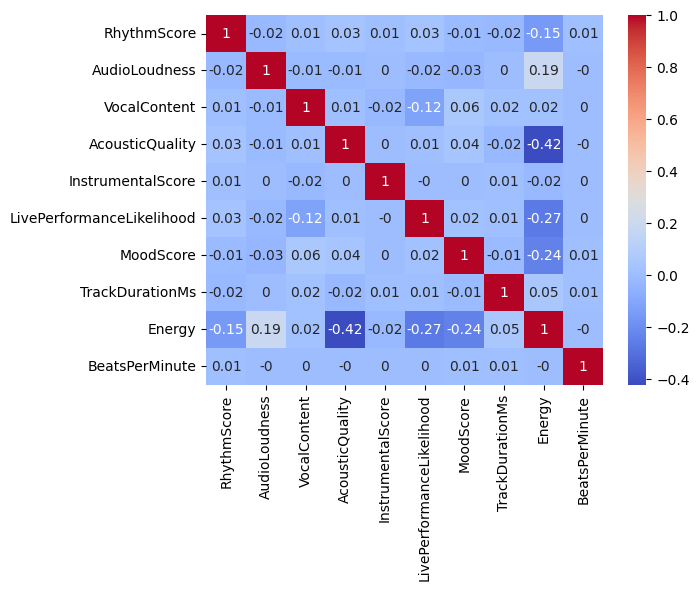

In [8]:
corr = round(df.corr(),2)
sns.heatmap(corr, annot=True, cmap='coolwarm')

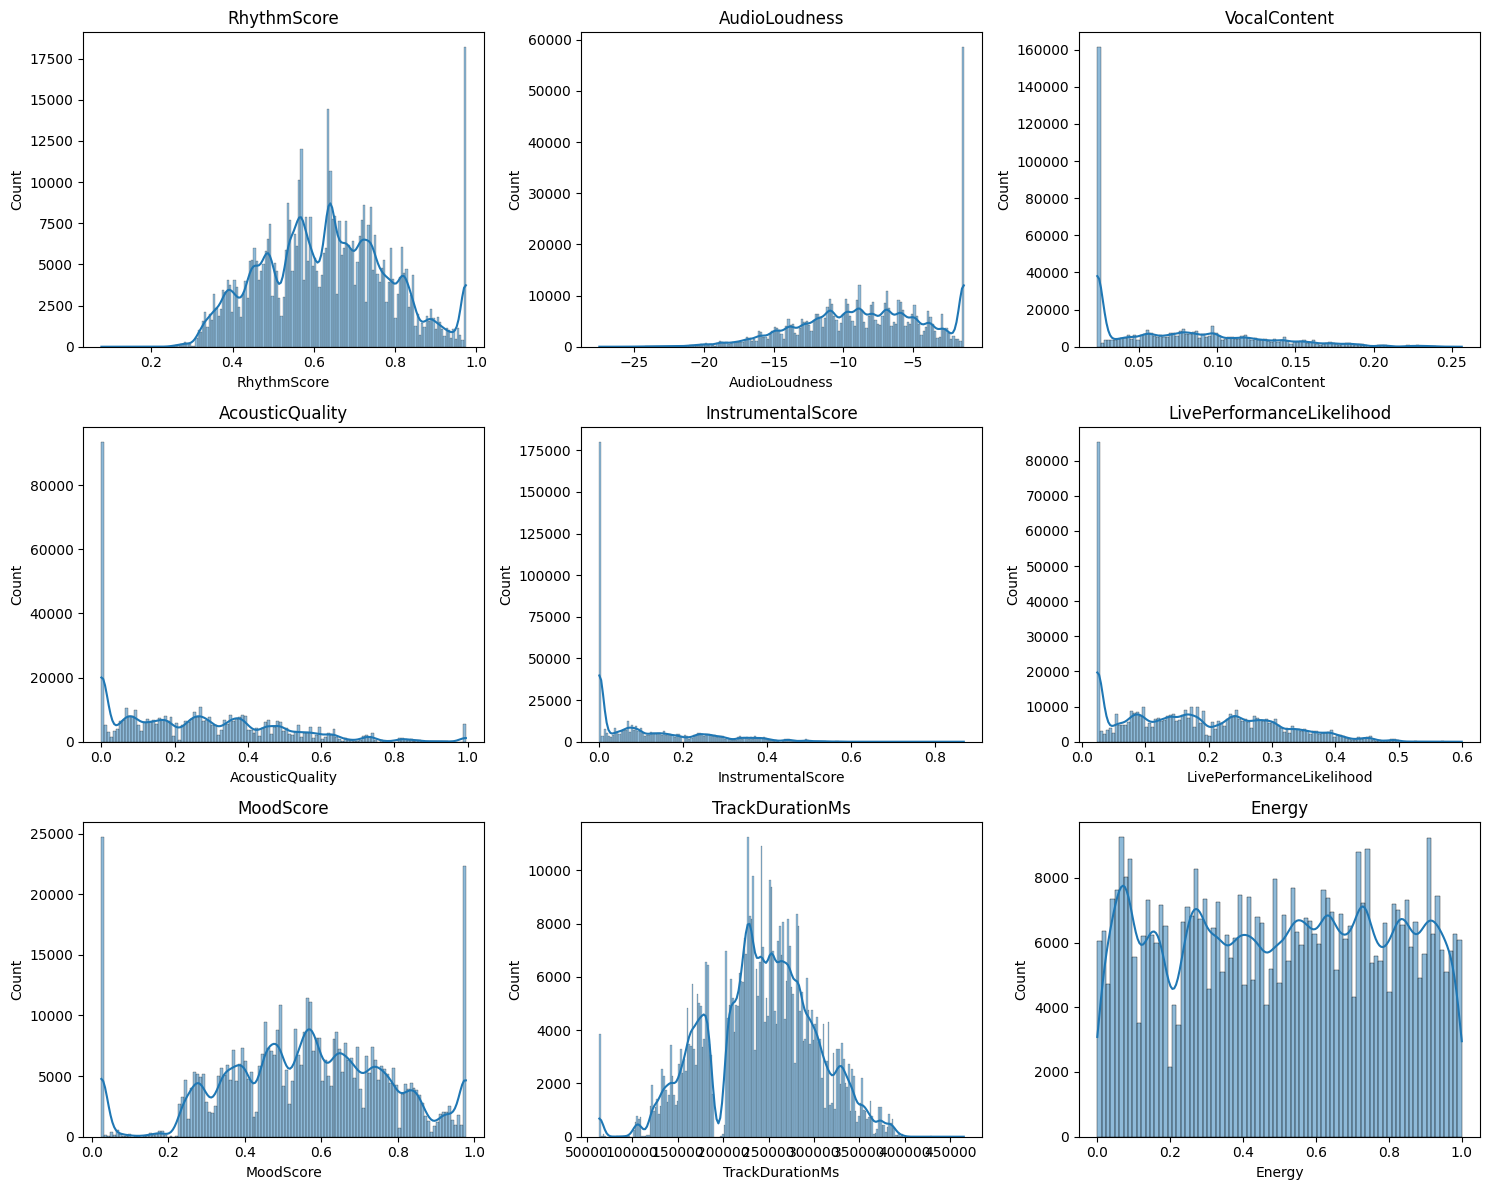

In [9]:
# Define grid size
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

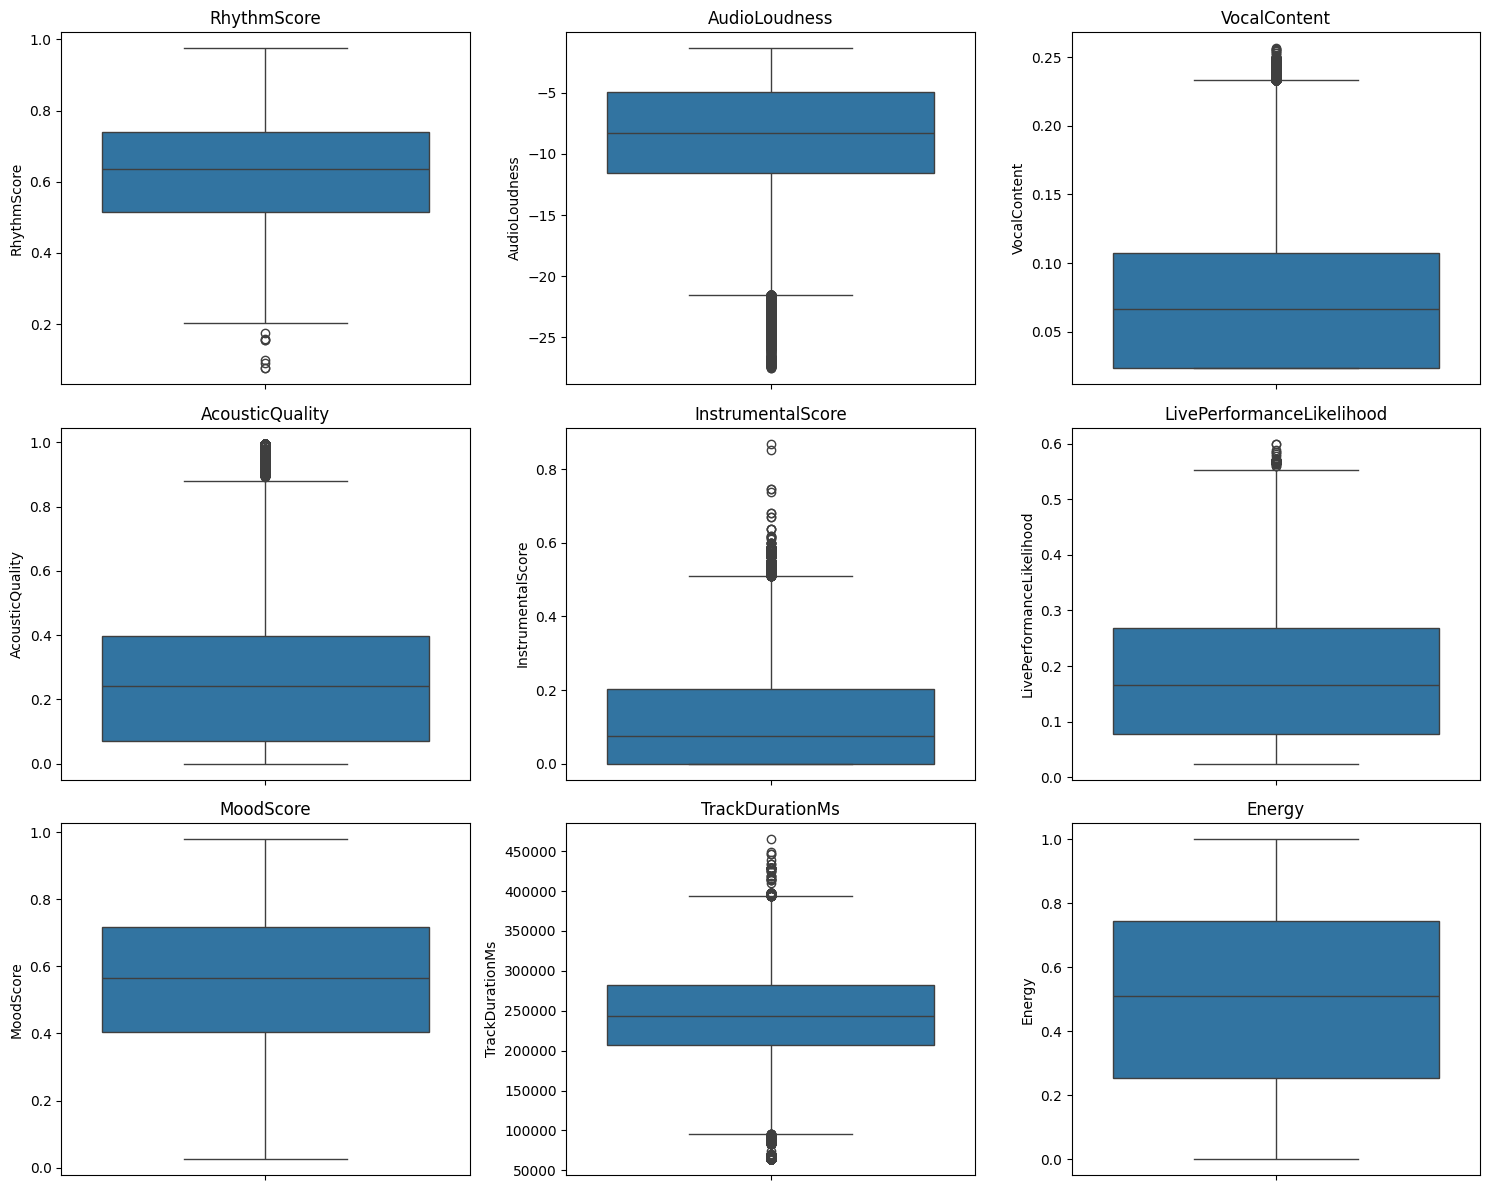

In [10]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(features):
    sns.boxplot(df[col],ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

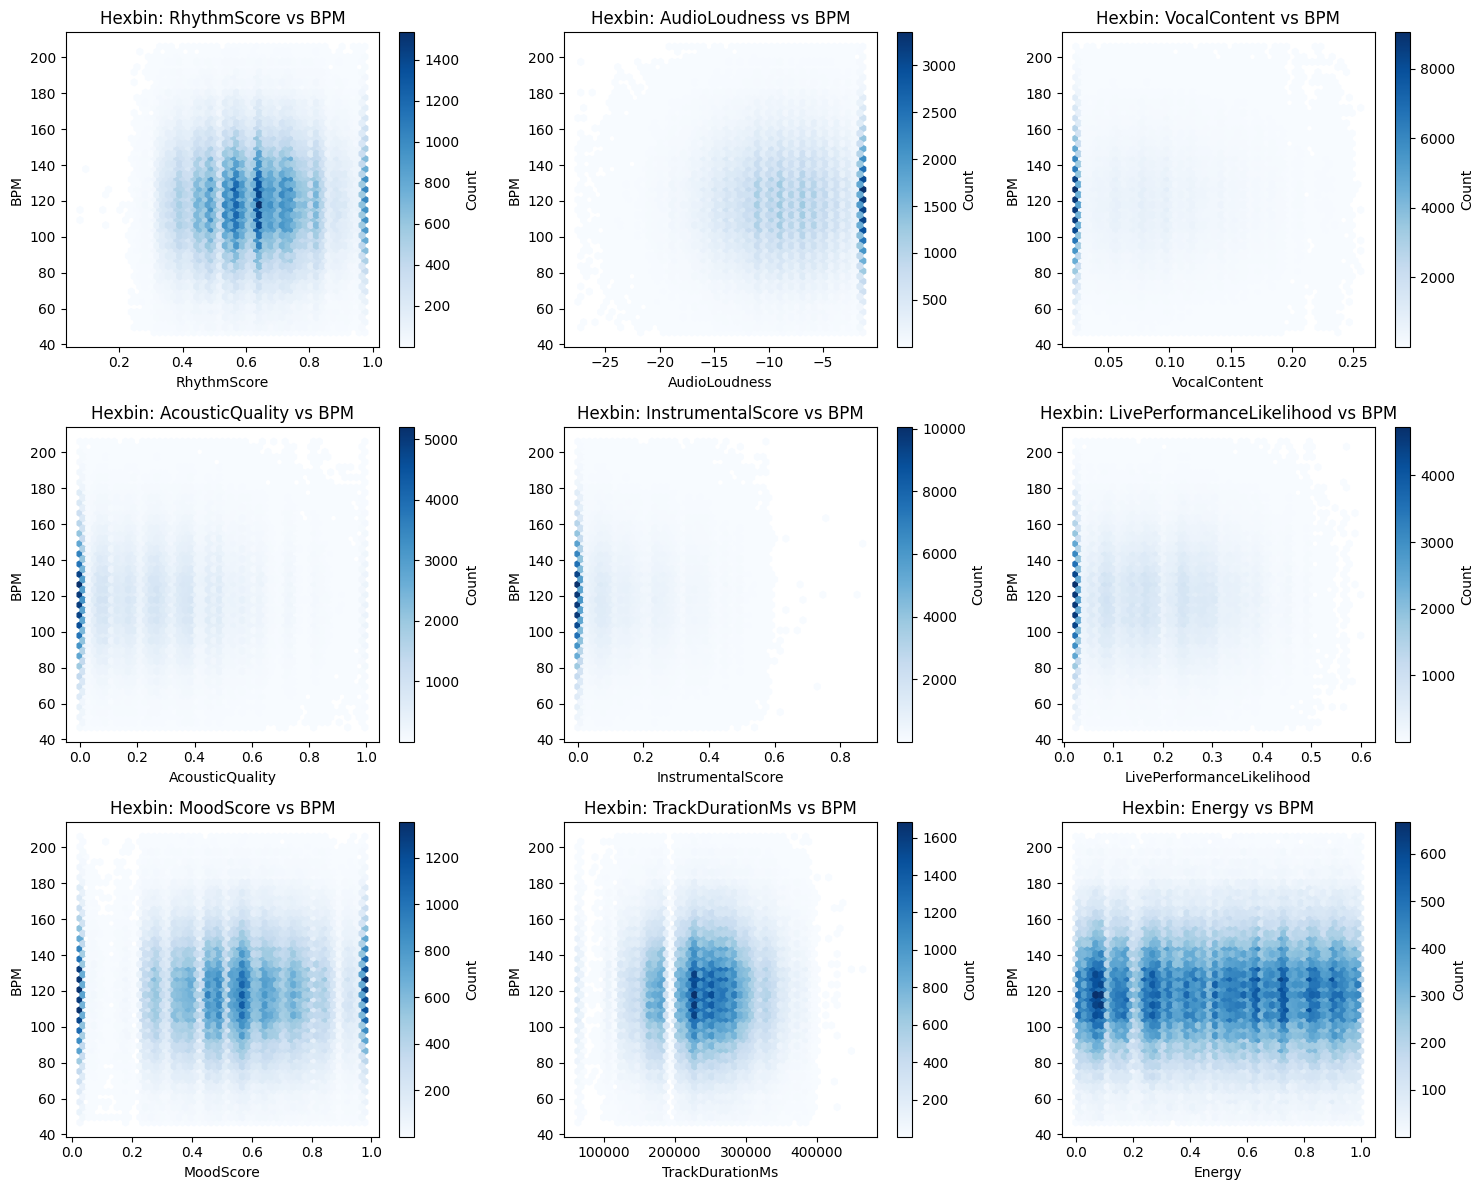

In [11]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(features):
    hb = axes[i].hexbin(df[col], df['BeatsPerMinute'], gridsize=50, cmap='Blues', mincnt=1)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('BPM')
    axes[i].set_title(f'Hexbin: {col} vs BPM')
    fig.colorbar(hb, ax=axes[i], label='Count')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Keep rows that are within 1.5 * IQR for all features
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# Path to sibling folder
save_path_outlier = current_dir.parent / 'data' / 'clean'/ 'train_no_outlier.csv'

In [14]:
df_clean.to_csv(save_path_outlier)

In [15]:
# Path to sibling folder
save_path_clean = current_dir.parent / 'data' / 'clean'/ 'train_clean.csv'

In [16]:
df.to_csv(save_path_clean)